In [154]:
import numpy as np
import numpy.random as npr
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import time
import networkx as nx
import networkx.algorithms.bipartite as bpt
import networkx.algorithms.isomorphism as iso
import scipy.sparse as sp

In [170]:
m, n = 15, 20
states = {}
identical = 0
collisions = 0
for _ in range(1000):
    G = bpt.configuration_model(aseq=[4]*m, bseq=[3]*n, create_using=nx.Graph())
    G_hash = nx.algorithms.weisfeiler_lehman_graph_hash(G, iterations=35, digest_size=32)
    if G_hash in states:
        if not iso.is_isomorphic(states[G_hash], G):
            collisions += 1
            print(f"{collisions = }")
        else:
            identical += 1
            print(f"{identical = }")
    else:
        states[G_hash] = G
    
print(f"{collisions = }, {identical = }")
    

collisions = 1
collisions = 2
collisions = 3
collisions = 4
collisions = 5
collisions = 6
collisions = 7
collisions = 8
collisions = 9
collisions = 10
collisions = 11
collisions = 12
collisions = 13
collisions = 14
collisions = 15
collisions = 16
collisions = 17
collisions = 18
collisions = 19
collisions = 20
collisions = 21
collisions = 22
collisions = 23
collisions = 24
collisions = 25
collisions = 26
collisions = 27
collisions = 28
collisions = 29
collisions = 30
collisions = 31
collisions = 32
collisions = 33
collisions = 34
collisions = 35
collisions = 36
collisions = 36, identical = 0


## Graph Visualizations and Matrix Sorting

In [143]:
def my_sort(a):
  ar = a[(np.lexsort(np.fliplr(a).T))[::-1]]
  ac = ar.T[(np.lexsort(np.fliplr(ar.T).T))[::-1]].T
  return ac

def repr(a):
  print('('+')\n('.join([''.join(r) for r in a.astype(int).astype(str)])+')')

(1100010)
(1001101)
(0111000)


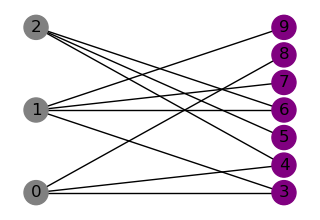

In [122]:
G = bpt.configuration_model(aseq=[4, 4, 4], bseq=[3, 2, 2, 2, 1, 1, 1], create_using=nx.Graph())
a = bpt.biadjacency_matrix(G, row_order=[0,1,2]).astype(np.bool_).todense()
repr(a)
pos = nx.layout.bipartite_layout(G, [0,1,2])

# Draw the graph
plt.figure(figsize=(3, 2))
nx.draw(G, pos, with_labels=True, node_color=['grey' if n in [0,1,2] else 'purple' for n in G.nodes()])
plt.show()

(1111000)
(1100111)
(1000110)


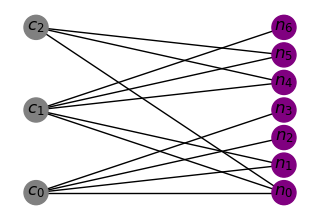

In [127]:
m, n = 3, 7
a = npr.randint(0, 2, (m, n), dtype=np.bool_)
a = my_sort(a)
repr(a)

G = bpt.from_biadjacency_matrix(sp.csr_matrix(a))
pos = nx.layout.bipartite_layout(G, [0,1,2])

# Draw the graph
plt.figure(figsize=(3, 2))
nx.draw(G, pos, labels={k:v for k, v in zip(list(range(m+n)), ([f'$c_{i}$' for i in range(m)]+[f'$n_{i}$' for i in range(n)]))},
        with_labels=True, node_color=['grey' if n in [0,1,2] else 'purple' for n in G.nodes()])
plt.show()

In [104]:
def MC(m, n, M):
  T = []
  for _ in range(M):
    a = npr.randint(0, 2, (m, n), dtype=np.bool_)
    t = time.time()
    my_sort(a)
    t = time.time() - t
    T.append(t)

  T = np.array(T)
  return T

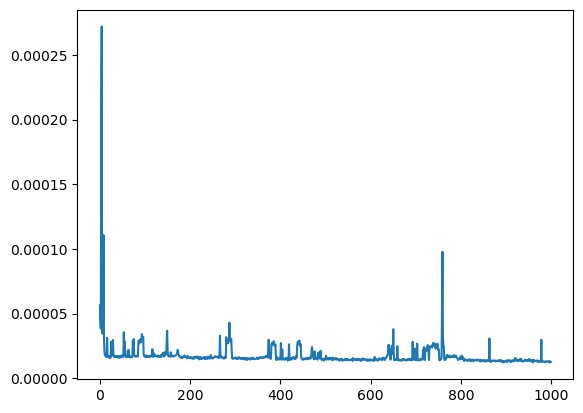

In [105]:
T = MC(3, 7, int(1e3))
plt.plot(T)

## Action encoding

In [115]:
m, n = 3, 7
def index_to_action(a: np.uint32) -> tuple[NDArray[np.uint8], 
                                           NDArray[np.uint8]]: 
    """
        Given an action index a in [0..A-1], A = n*(n-1)/2 * m(m-1)/2,
        compute (i, j), (k, l) indices of row pair and column pair where
        the braiding action is to be applied. 
    """
    # a = M*(n 2) + N
    M, N = np.divmod(a, n*(n-1)//2, dtype=np.uint16)
    # N = n i - (i+2)(i+1)/2 + j, M = m k - (k+2)(k+1)/2 + l
    i = np.floor(((2*n - 1) - np.sqrt((2*n-1)**2 - 8*N))//2)
    j = (N - n*i + ((i+2)*(i+1))//2)
    k = np.floor(((2*m - 1) - np.sqrt((2*m-1)**2 - 8*M))//2)
    l = (M - m*k + ((k+2)*(k+1))//2)
    
    return np.array([k, l]).astype(np.uint8), np.array([i, j]).astype(np.uint8)

def is_action_valid(state: NDArray[np.bool_], action: np.uint32) -> bool:
    submatrix = state[np.ix_(*index_to_action(action))]
    ID = np.eye(2, dtype=np.bool_)
    return (submatrix == ID).all() or (submatrix != ID).all()

In [123]:
repr(a)
print(a.dtype)

(1100010)
(1001101)
(0111000)
bool


In [124]:
sum([is_action_valid(a, k) for k in range(63)])

16